#**FOR DATA_1**

**DATA PREPROCESSING TASK**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#entry the given data
df=pd.read_csv('/content/data1.csv',header=None)

#normalised the data
for column in df.columns[0:3]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

# **LDA IMPLEMENTATION FOR BINARY CLASS**

In [ ]:
def lda(X2_train,Y2_train):
  #calculate co_variance matrix
  cov_inv=np.linalg.inv(np.cov(X2_train,rowvar=False))
  #calculate mean of X for each class
  mean_class_0 = np.mean(X2_train[Y2_train == 0], axis=0)
  mean_class_1 = np.mean(X2_train[Y2_train == 1], axis=0)

  #we have to calculate P(y=1/x)=1/1+exp(-a)
  w=cov_inv.dot(mean_class_1-mean_class_0)
  X1=X2_train[Y2_train==1]
  X0=X2_train[Y2_train==0]
  pi_1=len(X1)/len(Y2_train)
  pi_0=len(X0)/len(Y2_train)
  w_0=np.log((pi_1)/(pi_0))+0.5*(-mean_class_1.T.dot(cov_inv).dot(mean_class_1)+mean_class_0.T.dot(cov_inv).dot(mean_class_0))
  a=X2_train.dot(w)+w_0

  return a,w_0,w
a,w_0,w=lda(X2_train,Y2_train)


#we have to find the class
class_list=[]
for i in range(len(a)):
  if(a[i]>=0):
    class_list.append(1)
  else:
    class_list.append(0)

#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_train)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y2_train[i]==1 and class_list[i]==1):
    TP+=1
  elif(Y2_train[i]==0 and class_list[i]==0):
    TN+=1
  elif(Y2_train[i]==1 and class_list[i]==0):
    FN+=1
  elif(Y2_train[i]==0 and class_list[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)


True_positive= 81
True_negative= 70
False_negative= 1
False_positive= 8


# **PERFORMANCE MEASURES**

In [ ]:
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)


Accuracy of the model is= 0.94375
sensitivity of the model is= 0.9878048780487805
specificaty of the model is= 0.8974358974358975
precision of the model is=  0.9101123595505618
F_measure of the model is= 0.9473684210526315


In [ ]:
thre_list=[0,0.1,0.3,1,0.9,0.2,2]
def class_hist(thresold):
  TP=0
  TN=0
  FN=0
  FP=0
  class_list=[]
  for i in range (len(a)):
      if(a[i]>=thresold):
        class_list.append(1)
      else:
        class_list.append(0)

  return class_list

class_lists=[]



for thresold in thre_list:
  class_list=class_hist(thresold)
  class_lists.append(class_list)


TP = 0
TN = 0
FN = 0
FP = 0

#createing two empty list to store sensitivity and specificaty
True_positive_rate=[] #sensitivity
False_positive_rate=[] #false_positive_rate=1-specificiaty

for j in range(len(class_lists)):
    for i in range(len(Y2_train)):
        if Y2_train[i] == 1 and class_lists[j][i] == 1:
            TP += 1
        elif Y2_train[i] == 0 and class_lists[j][i] == 0:
            TN += 1
        elif Y2_train[i] == 1 and class_lists[j][i] == 0:
            FN += 1
        elif Y2_train[i] == 0 and class_lists[j][i] == 1:
            FP += 1

    #Accuracy
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    #sensitivity
    sensitivity=TP/(TP+FN)
    True_positive_rate.append(sensitivity)

    #specificity
    specificity=TN/(TN+FP)
    False_positive_rate.append(1-specificity)

    #precision
    precision=TP/(TP+FP)
    #F_measure
    F_measure=(2*precision*sensitivity)/(precision+sensitivity)
    print('Accuracy of the model is=',Accuracy)
    print('sensitivity of the model is=',sensitivity)
    print('specificaty of the model is=',specificity)
    print('precision of the model is= ',precision)
    print('F_measure of the model is=',F_measure)

Accuracy of the model is= 0.94375
sensitivity of the model is= 0.9878048780487805
specificaty of the model is= 0.8974358974358975
precision of the model is=  0.9101123595505618
F_measure of the model is= 0.9473684210526315
Accuracy of the model is= 0.946875
sensitivity of the model is= 0.9878048780487805
specificaty of the model is= 0.9038461538461539
precision of the model is=  0.9152542372881356
F_measure of the model is= 0.9501466275659824
Accuracy of the model is= 0.9458333333333333
sensitivity of the model is= 0.967479674796748
specificaty of the model is= 0.9230769230769231
precision of the model is=  0.9296875
F_measure of the model is= 0.9482071713147411
Accuracy of the model is= 0.903125
sensitivity of the model is= 0.8658536585365854
specificaty of the model is= 0.9423076923076923
precision of the model is=  0.9403973509933775
F_measure of the model is= 0.9015873015873016
Accuracy of the model is= 0.88125
sensitivity of the model is= 0.8121951219512196
specificaty of the mode

# **ROC CURVE**

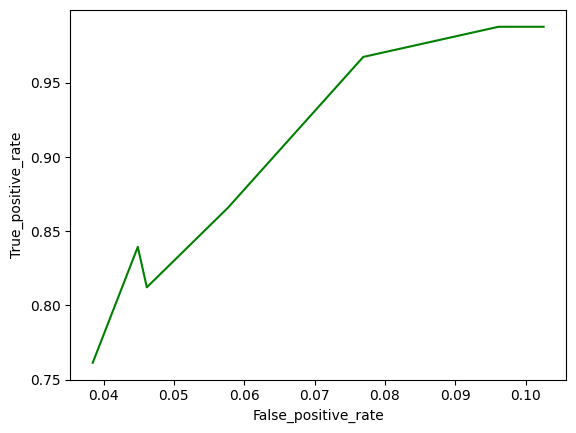

In [ ]:
#plot of the ROC curve
plt.plot(False_positive_rate,True_positive_rate,color='green')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.show()

#**1(B)PLOT DECISION BOUNDRIES**

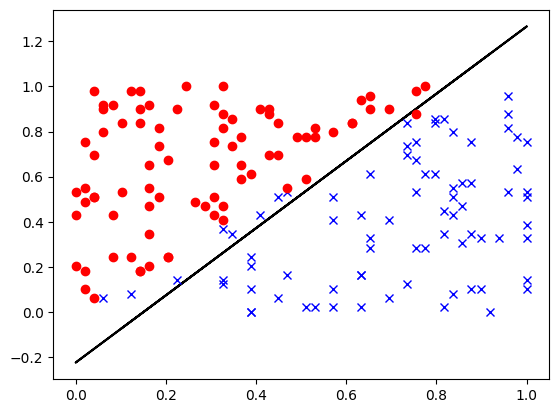

In [ ]:
#decision boundary
x3=X2_train[::,1]

x2=-(w_0+w[0]*x3)/w[1]

#plotting the decision boundary
plt.plot(x3,x2,c='black')
for i in range(len(X2_train)):
  if Y2_train[i]==1:
    plt.plot(X2_train[i,0],X2_train[i,1],c='red',marker='o')
  else:
    plt.plot(X2_train[i,0],X2_train[i,1],c='blue',marker='x')
plt.show()

**(d)Report the values of the parameters of the final models**

In [ ]:
w

array([-4.44545985,  2.98498485])

In [ ]:
print('value of the perameters are =',w_0,w[0],w[1])

value of the perameters are = 0.6674237585672269 -4.445459848656715 2.984984848784385


#**FOR DATA3**

In [ ]:
#entry the given data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#entry the given data
df=pd.read_csv('/content/data3.csv',header=None)

#normalised the data
for column in df.columns[0:3]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)



# **PERFORMANCE MEASURES**

In [ ]:
def lda(X2_train,Y2_train):
  #calculate co_variance matrix
  cov_inv=np.linalg.inv(np.cov(X2_train,rowvar=False))
  #calculate mean of X for each class
  mean_class_0 = np.mean(X2_train[Y2_train == 0], axis=0)
  mean_class_1 = np.mean(X2_train[Y2_train == 1], axis=0)

  #we have to calculate P(y=1/x)=1/1+exp(-a)
  w=cov_inv.dot(mean_class_1-mean_class_0)
  X1=X2_train[Y2_train==1]
  X0=X2_train[Y2_train==0]
  pi_1=len(X1)/len(Y2_train)
  pi_0=len(X0)/len(Y2_train)
  w_0=np.log((pi_1)/(pi_0))+0.5*(-mean_class_1.T.dot(cov_inv).dot(mean_class_1)+mean_class_0.T.dot(cov_inv).dot(mean_class_0))
  a=X2_train.dot(w)+w_0

  return a,w_0,w
a,w_0,w=lda(X2_train,Y2_train)


#we have to find the class
class_list=[]
for i in range(len(a)):
  if(a[i]>=0):
    class_list.append(1)
  else:
    class_list.append(0)

#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_train)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y2_train[i]==1 and class_list[i]==1):
    TP+=1
  elif(Y2_train[i]==0 and class_list[i]==0):
    TN+=1
  elif(Y2_train[i]==1 and class_list[i]==0):
    FN+=1
  elif(Y2_train[i]==0 and class_list[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)

True_positive= 83
True_negative= 77
False_negative= 0
False_positive= 0


In [ ]:
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

Accuracy of the model is= 1.0
sensitivity of the model is= 1.0
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 1.0


In [ ]:
thre_list=[2,0.5,0.2,0.3,0.9,0.4,1]
def class_hist(thresold):
  TP=0
  TN=0
  FN=0
  FP=0
  class_list=[]
  for i in range (len(a)):
      if(a[i]>=thresold):
        class_list.append(1)
      else:
        class_list.append(0)

  return class_list

class_lists=[]



for thresold in thre_list:
  class_list=class_hist(thresold)
  class_lists.append(class_list)


TP = 0
TN = 0
FN = 0
FP = 0

#createing two empty list to store sensitivity and specificaty
True_positive_rate=[] #sensitivity
False_positive_rate=[] #false_positive_rate=1-specificiaty

for j in range(len(class_lists)):
    for i in range(len(Y2_train)):
        if Y2_train[i] == 1 and class_lists[j][i] == 1:
            TP += 1
        elif Y2_train[i] == 0 and class_lists[j][i] == 0:
            TN += 1
        elif Y2_train[i] == 1 and class_lists[j][i] == 0:
            FN += 1
        elif Y2_train[i] == 0 and class_lists[j][i] == 1:
            FP += 1

    #Accuracy
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    #sensitivity
    sensitivity=TP/(TP+FN)
    True_positive_rate.append(sensitivity)

    #specificity
    specificity=TN/(TN+FP)
    False_positive_rate.append(1-specificity)

    #precision
    precision=TP/(TP+FP)
    #F_measure
    F_measure=(2*precision*sensitivity)/(precision+sensitivity)
    print('Accuracy of the model is=',Accuracy)
    print('sensitivity of the model is=',sensitivity)
    print('specificaty of the model is=',specificity)
    print('precision of the model is= ',precision)
    print('F_measure of the model is=',F_measure)

Accuracy of the model is= 0.70625
sensitivity of the model is= 0.43373493975903615
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.6050420168067226
Accuracy of the model is= 0.85
sensitivity of the model is= 0.7108433734939759
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.8309859154929577
Accuracy of the model is= 0.9
sensitivity of the model is= 0.8072289156626506
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.8933333333333333
Accuracy of the model is= 0.925
sensitivity of the model is= 0.8554216867469879
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.922077922077922
Accuracy of the model is= 0.93625
sensitivity of the model is= 0.8771084337349397
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.9345314505776636
Accuracy of the model is= 0.946875
sensitivi

**1(b)plot decession boundaries**

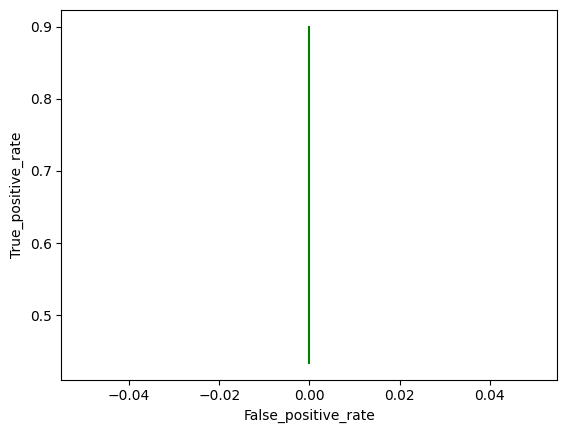

In [ ]:

#plot of the ROC curve
plt.plot(False_positive_rate,True_positive_rate,color='green')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.show()

#**1(c)Plot multivariate Gaussian density function corresponding to the positive & neg-
ative classes and their contours for Data 3.**

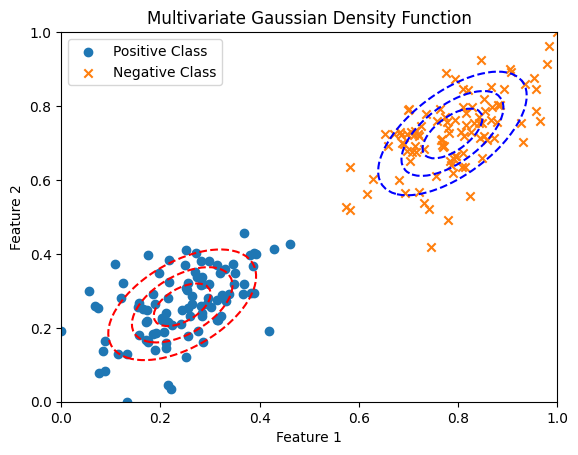

In [ ]:

import math
from math import exp
#separate positive and negative classes
X_pos=X[Y==1]
X_neg=X[Y==0]

# Calculate mean and covariance for positive and negative classes
mu_pos = np.mean(X_pos, axis=0)
cov_pos = np.cov(X_pos, rowvar=False)
mu_neg = np.mean(X_neg, axis=0)
cov_neg = np.cov(X_neg, rowvar=False)

# Create a meshgrid for plotting
x, y = np.meshgrid(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100),
                   np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100))
grid = np.c_[x.ravel(), y.ravel()]


def multivariate_p_normal(x,mu,covariance):
  fra_part=1/((2*(math.pi))**(50))*(np.linalg.det(covariance))**(0.5)
  exp_part = np.exp(-0.5 * np.sum(np.dot(x - mu, np.linalg.inv(covariance)) * (x - mu), axis=1))
  mvn_pos=fra_part*exp_part

  return mvn_pos


def multivariate_n_normal(x,mu,covariance):
  fra_part=1/((2*(math.pi))**(50))*(np.linalg.det(covariance))**(0.5)
  exp_part = np.exp(-0.5 * np.sum(np.dot(x - mu, np.linalg.inv(covariance)) * (x - mu), axis=1))
  mvn_neg=fra_part*exp_part

  return mvn_neg


# Evaluate PDF for each point in the meshgrid
pdf_pos = multivariate_p_normal(grid, mu_pos, cov_pos)
pdf_neg = multivariate_n_normal(grid, mu_neg, cov_neg)

# Reshape PDF values to match the shape of the meshgrid
pdf_pos = pdf_pos.reshape(x.shape)
pdf_neg = pdf_neg.reshape(x.shape)

# Plot the points with different colors for positive and negative classes
plt.scatter(X_pos[:, 0], X_pos[:, 1], label='Positive Class', marker='o')
plt.scatter(X_neg[:, 0], X_neg[:, 1], label='Negative Class', marker='x')

# Contour plots for positive and negative classes
plt.contour(x, y, pdf_pos, levels=3, colors='r', linestyles='dashed')
plt.contour(x, y, pdf_neg, levels=3, colors='b', linestyles='dashed')

plt.title('Multivariate Gaussian Density Function')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#**(3)Heart Disease data set**

**(3)(a)(b)Hold Out and Data preprocessing techniques**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df=pd.read_csv('/content/heart.csv')

#normalised the data
for column in df.columns[0:7]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)



In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,168,0,1.0,2,2,3,0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,155,1,3.1,0,0,3,0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,125,1,2.6,0,0,3,0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,161,0,0.0,2,1,3,0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,164,1,0.0,2,0,2,1
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,141,1,2.8,1,1,3,0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,118,1,1.0,1,1,2,0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,159,0,0.0,2,0,2,1


In [ ]:
def lda(X2_train,Y2_train):
  #calculate co_variance matrix
  cov_inv=np.linalg.inv(np.cov(X2_train,rowvar=False))
  #calculate mean of X for each class
  mean_class_0 = np.mean(X2_train[Y2_train == 0], axis=0)
  mean_class_1 = np.mean(X2_train[Y2_train == 1], axis=0)

  #we have to calculate P(y=1/x)=1/1+exp(-a)
  w=cov_inv.dot(mean_class_1-mean_class_0)
  X1=X2_train[Y2_train==1]
  X0=X2_train[Y2_train==0]
  pi_1=len(X1)/len(Y2_train)
  pi_0=len(X0)/len(Y2_train)
  w_0=np.log((pi_1)/(pi_0))+0.5*(-mean_class_1.T.dot(cov_inv).dot(mean_class_1)+mean_class_0.T.dot(cov_inv).dot(mean_class_0))
  a=X2_train.dot(w)+w_0

  return a,w_0,w
a,w_0,w=lda(X2_train,Y2_train)


#we have to find the class
class_list=[]
for i in range(len(a)):
  if(a[i]>=0):
    class_list.append(1)
  else:
    class_list.append(0)



**(c) Report the value of the performance measures used**

In [ ]:
#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_train)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y2_train[i]==1 and class_list[i]==1):
    TP+=1
  elif(Y2_train[i]==0 and class_list[i]==0):
    TN+=1
  elif(Y2_train[i]==1 and class_list[i]==0):
    FN+=1
  elif(Y2_train[i]==0 and class_list[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)

#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

True_positive= 394
True_negative= 297
False_negative= 32
False_positive= 97
Accuracy of the model is= 0.8426829268292683
sensitivity of the model is= 0.9248826291079812
specificaty of the model is= 0.7538071065989848
precision of the model is=  0.8024439918533605
F_measure of the model is= 0.8593238822246457


#**MULTI CLASS LDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('/content/data5.csv',header=None)
#df.dropna()
#normalised the data
for column in df.columns[0:3]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

# Convert Y2_train to binary classes
Y2_train_binary = np.where(Y2_train == 1, 1, 0)
# Convert Y2_test to binary classes
Y2_test_binary = np.where(Y2_test == 1, 1, 0)


In [ ]:
def lda(X2_train,Y2_train_binary):
  #calculate co_variance matrix
  cov_inv=np.linalg.inv(np.cov(X2_train,rowvar=False))
  #calculate mean of X for each class
  mean_class_0 = np.mean(X2_train[Y2_train_binary == 0], axis=0)
  mean_class_1 = np.mean(X2_train[Y2_train_binary == 1], axis=0)

  #we have to calculate P(y=1/x)=1/1+exp(-a)
  w=cov_inv.dot(mean_class_1-mean_class_0)
  X1=X2_train[Y2_train_binary==1]
  X0=X2_train[Y2_train_binary==0]
  pi_1=len(X1)/len(Y2_train_binary)
  pi_0=len(X0)/len(Y2_train_binary)
  w_0=np.log((pi_1)/(pi_0))+0.5*(-mean_class_1.T.dot(cov_inv).dot(mean_class_1)+mean_class_0.T.dot(cov_inv).dot(mean_class_0))
  a=X2_train.dot(w)+w_0

  return a,w_0,w
a,w_0,w=lda(X2_train,Y2_train_binary)

# **PERFORMANCE MEASURES**

In [ ]:
#we have to find the class
class_list=[]
for i in range(len(a)):
  if(a[i]>=0):
    class_list.append(1)
  else:
    class_list.append(0)

#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_train)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y2_train[i]==1 and class_list[i]==1):
    TP+=1
  elif(Y2_train[i]==0 and class_list[i]==0):
    TN+=1
  elif(Y2_train[i]==1 and class_list[i]==0):
    FN+=1
  elif(Y2_train[i]==0 and class_list[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)

True_positive= 78
True_negative= 0
False_negative= 2
False_positive= 0


In [ ]:
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
#specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
#print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

Accuracy of the model is= 0.975
sensitivity of the model is= 0.975
precision of the model is=  1.0
F_measure of the model is= 0.9873417721518987


# **PLOT DECESSION BOUNDARY**

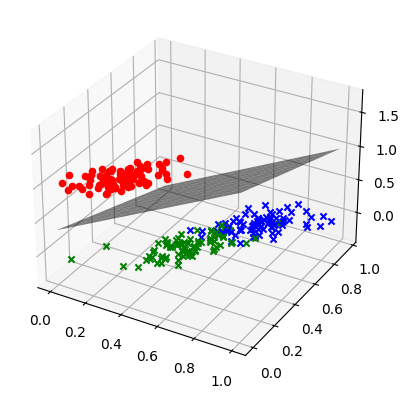

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Decision boundary
x1 = X2_train[:, 0]
x2 = X2_train[:, 1]
x3 = -(w_0 + w[0] * x1 + w[1] * x2) / w[2]

# Create grid for plotting
x = np.linspace(min(x1), max(x1), num=10)
y = np.linspace(min(x2), max(x2), num=10)
X, Y = np.meshgrid(x, y)
Z = -(w_0 + w[0] * X + w[1] * Y) / w[2]

# plotting the decision boundary in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundary
ax.plot_surface(X, Y, Z, color='black', alpha=0.5)

# plot data points
for i in range(len(X2_train)):
    if Y2_train[i] == 1:
        ax.scatter(X2_train[i, 0], X2_train[i, 1], 1, c='red', marker='o')
    elif Y2_train[i]==2:
        ax.scatter(X2_train[i, 0], X2_train[i, 1], 0, c='blue', marker='x')
    else:
      ax.scatter(X2_train[i, 0], X2_train[i, 1], 0, c='green', marker='x')

plt.show()


# **PLOT IN ONE FRAME**

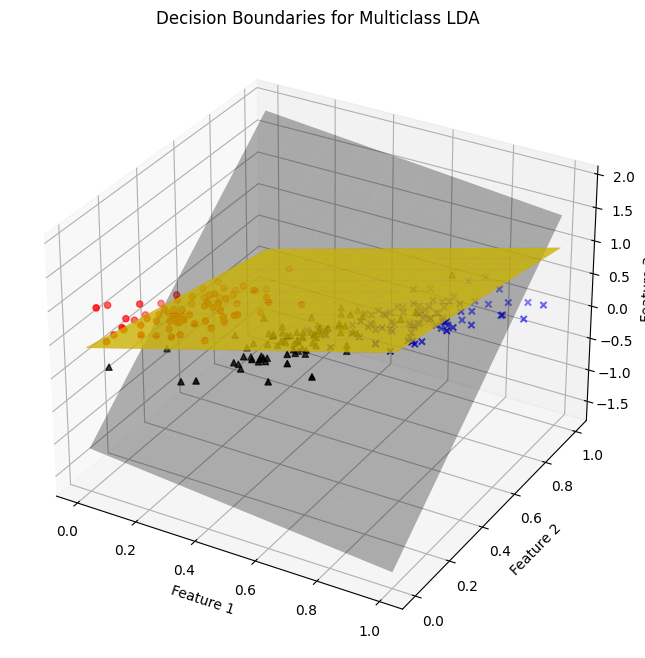

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('/content/data5.csv', header=None)

# Normalize the data
for column in df.columns[0:3]:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperate X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

total_rows = len(X)

# Divide the data into training and testing data
train_rows = int(0.8 * total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

# Convert Y2_train to binary classes
Y2_train_binary = np.where(Y2_train == 1, 1, 0)  # Class 1 remains 1, Classes 2 and 3 become 0

# Convert Y2_test to binary classes
Y2_test_binary = np.where(Y2_test == 1, 1, 0)  # Class 1 remains 1, Classes 2 and 3 become 0


def lda(X, Y_binary):
    cov_inv = np.linalg.inv(np.cov(X, rowvar=False))
    mean_class_0 = np.mean(X[Y_binary == 0], axis=0)
    mean_class_1 = np.mean(X[Y_binary == 1], axis=0)
    w = cov_inv.dot(mean_class_1 - mean_class_0)
    X1 = X[Y_binary == 1]
    X0 = X[Y_binary == 0]
    pi_1 = len(X1) / len(Y_binary)
    pi_0 = len(X0) / len(Y_binary)
    w_0 = np.log((pi_1) / (pi_0)) + 0.5 * (
            -mean_class_1.T.dot(cov_inv).dot(mean_class_1) + mean_class_0.T.dot(cov_inv).dot(mean_class_0))
    a = X.dot(w) + w_0

    return a, w_0, w


# Decision boundaries for class 1 vs {class 2, class 3}
a_12, w_0_12, w_12 = lda(X2_train, Y2_train_binary)

# Decision boundaries for class 2 vs {class 1, class 3}
a_23, w_0_23, w_23 = lda(X2_train, np.where((Y2_train == 2) | (Y2_train == 3), 1, 0))

# Decision boundaries for class 3 vs {class 1, class 2}
a_13, w_0_13, w_13 = lda(X2_train, np.where((Y2_train == 3) | (Y2_train == 1), 1, 0))

# Plot decision boundaries together
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create grid for plotting
x = np.linspace(0, 1, num=10)
y = np.linspace(0, 1, num=10)
X, Y = np.meshgrid(x, y)

# Plot decision boundary for class 2 vs {class 1, class 3}
Z_23 = -(w_0_23 + w_23[0] * X + w_23[1] * Y) / w_23[2]
ax.plot_surface(X, Y, Z_23, color='red', alpha=0.3, label='Class 2 vs {Class 1, 3}')

# Plot decision boundary for class 3 vs {class 1, class 2}
Z_13 = -(w_0_13 + w_13[0] * X + w_13[1] * Y) / w_13[2]
ax.plot_surface(X, Y, Z_13, color='black', alpha=0.3, label='Class 3 vs {Class 1, 2}')

# Plot decision boundary for class 1 vs {class 2, class 3}
Z_12 = -(w_0_12 + w_12[0] * X + w_12[1] * Y) / w_12[2]
ax.plot_surface(X, Y, Z_12, color='yellow', alpha=0.7, label='Class 1 vs {Class 2, 3}')

# Plot data points
# Plot data points for Class 1
ax.scatter(X2_train[Y2_train == 1, 0], X2_train[Y2_train == 1, 1], X2_train[Y2_train == 1, 2], c='red', marker='o')

# Plot data points for Class 2
ax.scatter(X2_train[Y2_train == 2, 0], X2_train[Y2_train == 2, 1], X2_train[Y2_train == 2, 2], c='blue', marker='x')

# Plot data points for Class 3
ax.scatter(X2_train[Y2_train == 3, 0], X2_train[Y2_train == 3, 1], X2_train[Y2_train == 3, 2], c='black', marker='^')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Decision Boundaries for Multiclass LDA')

#plt.legend()
plt.show()


# **LDA ON ARRHYTHMIA DATA SET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")

# Load the data
df=pd.read_csv('/content/arrhythmia.data')
df


,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
for column_name in df.columns:
    numeric_column = pd.to_numeric(df[column_name], errors='coerce')
    if numeric_column.isnull().any():
        print(f"The column '{column_name}' has non-numeric values.")
    else:
        print(f"The column '{column_name}' contains only numeric values.")


The column '75' contains only numeric values.
The column '0' contains only numeric values.
The column '190' contains only numeric values.
The column '80' contains only numeric values.
The column '91' contains only numeric values.
The column '193' contains only numeric values.
The column '371' contains only numeric values.
The column '174' contains only numeric values.
The column '121' contains only numeric values.
The column '-16' contains only numeric values.
The column '13' has non-numeric values.
The column '64' has non-numeric values.
The column '-2' has non-numeric values.
The column '?' has non-numeric values.
The column '63' has non-numeric values.
The column '0.3' contains only numeric values.
The column '52' contains only numeric values.
The column '44' contains only numeric values.
The column '0.5' contains only numeric values.
The column '0.7' contains only numeric values.
The column '32' contains only numeric values.
The column '0.10' contains only numeric values.
The colum

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame
# Replace '?' with NaN in the entire DataFrame
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric, coercing non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with any NaN values
df = df.dropna(axis=1)

# Print the new DataFrame
print(df)


     75  0  190  80   91  193  371  174  121  -16  ...  0.0.38   9.0  -0.9  \
0    56  1  165  64   81  174  401  149   39   25  ...     0.0   8.5   0.0   
1    54  0  172  95  138  163  386  185  102   96  ...     0.0   9.5  -2.4   
2    55  0  175  94  100  202  380  179  143   28  ...     0.0  12.2  -2.2   
3    75  0  190  80   88  181  360  177  103  -16  ...     0.0  13.1  -3.6   
4    13  0  169  51  100  167  321  174   91  107  ...    -0.6  12.2  -2.8   
..   .. ..  ...  ..  ...  ...  ...  ...  ...  ...  ...     ...   ...   ...   
446  53  1  160  70   80  199  382  154  117  -37  ...     0.0   4.3  -5.0   
447  37  0  190  85  100  137  361  201   73   86  ...     0.0  15.6  -1.6   
448  36  0  166  68  108  176  365  194  116  -85  ...     0.0  16.3 -28.6   
449  32  1  155  55   93  106  386  218   63   54  ...    -0.4  12.0  -0.7   
450  78  1  160  70   79  127  364  138   78   28  ...     0.0  10.4  -1.8   

     0.0.39  0.0.40  0.9.2  2.9.1  23.3  49.4   8  
0       0.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")

# Load the data
#df=pd.read_csv('/content/arrhythmia.data')

# Normalize the data
for column in df.columns[0:274]:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperate X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

total_rows = len(X)

# Divide the data into training and testing data
train_rows = int(0.8 * total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

In [ ]:
np.unique(Y2_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16])

In [ ]:
# Convert Y2_train to binary classes
num_classes = int(np.max(Y2_train) + 1)
Y2_train_binary = np.eye(num_classes)[Y2_train.astype(int)]

# Convert Y2_test to binary classes
Y2_test_binary = np.eye(num_classes)[Y2_test.astype(int)]

def lda(X, Y_binary):
    cov_inv = np.linalg.inv(np.cov(X, rowvar=False))
    means = [np.mean(X[Y_binary[:, i] == 1], axis=0) for i in range(Y_binary.shape[1])]
    w = np.column_stack([cov_inv.dot(mean) for mean in means])
    w_0 = np.array([np.log(len(X[Y_binary[:, i] == 1]) / len(Y_binary)) +
                    0.5 * (-means[i].T.dot(cov_inv).dot(means[i]) +
                           means[0].T.dot(cov_inv).dot(means[0])) for i in range(Y_binary.shape[1])])
    a = X.dot(w) + w_0

    return a, w_0, w

# Example usage for all pairs of classes
class_pairs = [(i, j) for i in range(1, num_classes) for j in range(i + 1, num_classes)]

for class1, class2 in class_pairs:
    # Select the data for the current class pair
    indices = np.where((Y2_train == class1) | (Y2_train == class2))[0]
    X_subset = X2_train[indices, :]
    Y_subset_binary = np.column_stack([(Y2_train == i).astype(int) for i in [class1, class2]])

    # Apply LDA for the current class pair
    a, w_0, w = lda(X_subset, Y_subset_binary)

    # Your further processing or analysis for each class pair
    print(f'Decision Boundaries for Class {class1} vs Class {class2}')
    print('W:', w)
    print('W_0:', w_0)
    print('\n')


IndexError: ignored